<a href="https://colab.research.google.com/github/xcsengody/DP/blob/master/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip -q install parfit

import sys
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
sys.path.append('/content/drive/My Drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks/Notebooks')

from lib.Config import *
from lib.MachineLearningController import *

def saveDocument(fileName):
  !jupyter nbconvert --log-level 0 --output {fileName} --output-dir='drive/My Drive/Colab Notebooks/Documents' "drive/My Drive/Colab Notebooks/Notebooks/MachineLearningController.ipynb"
  print("File saved to .../Colab Notebooks/Documents/{}.html".format(fileName))

In [0]:
datasets_to_load=['dataset_1.csv','dataset_2.csv','dataset_3.csv','dataset_4.csv']
loadPreprocessedDatasets(datasets_to_load)

Datasets:
dataset_1
dataset_2
dataset_3
dataset_4

To access dataset use datasets['datasetName']



In [0]:
getDatasetDimensions(datasets['dataset_1'])
getDatasetDimensions(datasets['dataset_2'])
getDatasetDimensions(datasets['dataset_3'])
getDatasetDimensions(datasets['dataset_4'])

Rows: 699984
Columns: 50

Rows: 699999
Columns: 50

Rows: 699999
Columns: 50

Rows: 440042
Columns: 50



In [0]:
dataset = mergeDatasets([datasets['dataset_3'],datasets['dataset_4']])
X_train, y_train, X_valid, y_valid, X_test, y_test = splitDataset(dataset)

Train set size: 729625
Validation set size: 182407
Test set size: 228009



In [0]:
analyzeDataset(dataset)
getCorelationMatrix(X_train)

In [0]:
# ---> Logistic Regression <---

In [0]:
logisticRegression_model = LogisticRegression()
rfe = RFE(logisticRegression_model, n_features_to_select=None, step=8, verbose=2)
logisticRegression = rfe.fit(X_train, y_train)

selected_columns=[]
columns = X_train.columns
ranked_columns = rfe.support_

for i in range(len(ranked_columns)):
  if ranked_columns[i] == True:
    selected_columns.append(columns[i])

X_train_logreg=X_train[selected_columns]

logisticRegression_model=sm.Logit(y_train,X_train_logreg)
logisticRegression=logisticRegression_model.fit()
print(logisticRegression.summary2())

In [0]:
selected_columns=['srcip',
                  'dstip',
                  'dsport',
                  'proto',
                  'state',
                  'dbytes',
                  'sttl',
                  'dttl',
                  'sloss',
                  'dloss',
                  'Dload',
                  'Spkts',
                  'Dpkts',
                  'swin',
                  'dmeansz',
                  'tcprtt',
                  'synack',
                  'ackdat',
                  'ct_state_ttl',
                  'is_ftp_login',
                  'ct_srv_src',
                  'ct_srv_dst',
                  'ct_dst_sport_ltm',
                  'ct_dst_src_ltm']
                  
X_train_logreg=X_train[selected_columns]

logisticRegression_model=sm.Logit(y_train,X_train_logreg)
logisticRegression=logisticRegression_model.fit()
print(logisticRegression.summary2())

In [0]:
params = {'penalty': ['l2'],
         'dual': [False],
         'C':[.009,0.01,.09,1,5],
         'solver': ['lbfgs','saga'],
         'max_iter': [100,500],
         'multi_class': ['ovr','auto'],
         'warm_start': [True,False]}

logisticRegression_model = LogisticRegression()
logisticRegression_gridSearch = GridSearchCV(logisticRegression_model, param_grid = params, cv = 10, n_jobs=-1, verbose=2)
logisticRegression_gridSearch = logisticRegression_gridSearch.fit(X_train, y_train)

pprint(logisticRegression_gridSearch.best_params_)

In [0]:
'''
{'C': 5,
 'dual': False,
 'max_iter': 500,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'lbfgs',
 'warm_start': True}
'''

logisticRegression_model = LogisticRegression(solver='lbfgs',penalty='l2',multi_class='ovr',C=5,max_iter=500,warm_start=True,dual=False,n_jobs=-1,verbose=2)
selectTopFeatures=False;

if selectTopFeatures:
  X_train_logreg=X_train[selected_columns]
  X_test_logreg=X_test[selected_columns]
  X_valid_logreg=X_valid[selected_columns]

  logisticRegression_selectedFeatures = logisticRegression_model.fit(X_train_logreg, y_train)
  predict(logisticRegression_selectedFeatures, X_test_logreg, y_test,"Test set prediction")
  predict(logisticRegression_selectedFeatures, X_valid_logreg, y_valid,"Validation set prediction")

  saveModel(logisticRegression_selectedFeatures,'logisticRegression_selectedFeatures')
else:
  logisticRegression = logisticRegression_model.fit(X_train, y_train)
  predict(logisticRegression, X_test, y_test,"Test set prediction")
  predict(logisticRegression, X_valid, y_valid,"Validation set prediction")

  saveModel(logisticRegression,'logisticRegression')

In [0]:
# ---> SCV <---

In [0]:
grid = {'alpha': [1e-2, 1e-1, 1e0, 1e1, 1e2],
        'max_iter': [500],
        'loss': ['log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'eta0': [0.2],
        'fit_intercept': [True,False],
        'shuffle': [True,False],
        'early_stopping': [True,False],
        'penalty': ['l2','elasticnet'],
        'n_jobs': [-1]}

paramGrid = ParameterGrid(grid)
SGDClassifier_model = linear_model.SGDClassifier()
bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier_model, paramGrid,
                                                        X_train, y_train, X_valid, y_valid, 
                                                        metric = roc_auc_score, scoreLabel = 'AUC')

print(bestModel, bestScore)

In [0]:
SGDClassifier_model = linear_model.SGDClassifier(alpha=0.01, average=False, class_weight=None, early_stopping=True,
              epsilon=0.1, eta0=0.2, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='log', max_iter=500,
              n_iter_no_change=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

SGDClassifier_model = linear_model.SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.2, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='modified_huber',
              max_iter=500, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=False, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

selectTopFeatures=True;

if selectTopFeatures:
  feature_map_nystroem = Nystroem(random_state=0,n_components=10)
  X_train_svc = feature_map_nystroem.fit_transform(X_train)
  X_test_svc = feature_map_nystroem.fit_transform(X_test)
  X_valid_svc = feature_map_nystroem.fit_transform(X_valid)

  SGDClassifier = SGDClassifier_model.fit(X_train_svc, y_train)
  predict(SGDClassifier, X_test_svc, y_test,"Test set prediction")
  predict(SGDClassifier, X_valid_svc, y_valid,"Validation set prediction")
else:
  SGDClassifier = SGDClassifier_model.fit(X_train, y_train)
  predict(SGDClassifier, X_test, y_test,"Test set prediction")
  predict(SGDClassifier, X_valid, y_valid,"Validation set prediction")

In [0]:
# ---> Decision Tree <---

In [0]:
decisionTree_model = DecisionTreeClassifier(max_features='auto')
decisionTree = decisionTree_model.fit(X_train, y_train)

predict(decisionTree, X_test, y_test,"Test set prediction")
predict(decisionTree, X_valid, y_valid,"Validation set prediction")

saveModel(decisionTree,'decisionTree')

In [0]:
# ---> Random Forest <---

In [0]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [5, 10, 15, 20]
min_samples_leaf = [2, 4, 6, 8, 10]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 10, n_jobs=-1, verbose = 2)
randomForest_randomSearch = random_search.fit(X_train, y_train)

pprint(randomForest_randomSearch.best_params_)
predict(randomForest_randomSearch, X_test, y_test,"Test set prediction")
predict(randomForest_randomSearch, X_valid, y_valid,"Validation set prediction")

In [0]:
params = {'n_estimators': [130,150],
          'max_features': ['log2'],
          'max_depth': [130,150],
          'min_samples_split': [8,10],
          'min_samples_leaf': [5],
          'bootstrap': [False]}

params = {'bootstrap': [False],
          'max_depth': [None],
          'max_features': ['auto'],
          'min_samples_leaf': [5,6,7],
          'min_samples_split': [11,13,15],
          'n_estimators': [50,70,90]}

model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 3, n_jobs=-1, verbose = 2)
randomForest_gridSearch = grid_search.fit(X_train, y_train)

pprint(randomForest_gridSearch.best_params_)
predict(randomForest_gridSearch, X_test, y_test,"Test set prediction")
predict(randomForest_gridSearch, X_valid, y_valid,"Validation set prediction")

Selected features: Index(['srcip', 'dstip', 'sbytes', 'sttl', 'Sload', 'Dload', 'Dpkts',
       'smeansz', 'dmeansz', 'ct_state_ttl'],
      dtype='object')


Test set prediction


Accuracy: 98.98%


Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    178654
           1       0.98      0.98      0.98     49355

    accuracy                           0.99    228009
   macro avg       0.98      0.98      0.98    228009
weighted avg       0.99      0.99      0.99    228009



Confusion-matrix
 Predicted Species       0      1
Actual Species                  
0                  177494   1160
1                    1177  48178


ROC-AUC: 0.9995859769006687



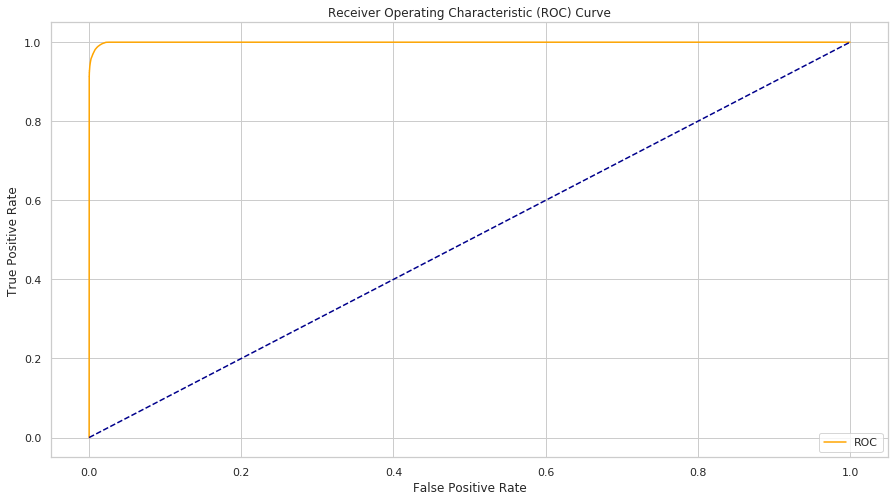





Validation set prediction


Accuracy: 98.98%


Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    142863
           1       0.98      0.98      0.98     39544

    accuracy                           0.99    182407
   macro avg       0.99      0.98      0.98    182407
weighted avg       0.99      0.99      0.99    182407



Confusion-matrix
 Predicted Species       0      1
Actual Species                  
0                  141948    915
1                     953  38591


ROC-AUC: 0.999589500481603



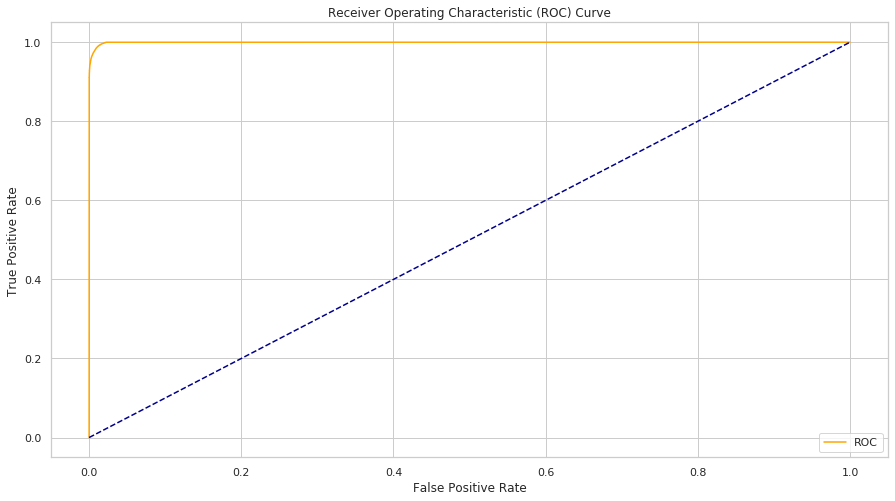



Model saved to .../Colab Notebooks/MachineLearningModels/randomForest_selectedFeatures.sav



In [0]:
#randomForestModel = RandomForestClassifier(n_estimators=110,max_features='log2',max_depth=120,min_samples_split=8,min_samples_leaf=5,bootstrap=False,n_jobs=-1)
randomForestModel = RandomForestClassifier(n_estimators=70,max_features='auto',max_depth=None,min_samples_split=11,min_samples_leaf=5,bootstrap=False,n_jobs=-1)

selectTopFeatures=True;

if selectTopFeatures:
  selected_features = SelectFromModel(randomForestModel)
  selected_features.fit(X_train, y_train)
  features = X_train.columns[(selected_features.get_support())]
  X_train_randForest = selected_features.transform(X_train)
  X_test_randForest = selected_features.transform(X_test)
  X_valid_randForest = selected_features.transform(X_valid)

  print("Selected features: {}".format(features))

  randomForest = randomForestModel.fit(X_train_randForest, y_train)
  predict(randomForest, X_test_randForest, y_test,"Test set prediction")
  predict(randomForest, X_valid_randForest, y_valid,"Validation set prediction")

  saveModel(randomForest,'randomForest_selectedFeatures')
else:
  randomForest = randomForestModel.fit(X_train, y_train)
  joblib.dump(randomForest, 'randomForest.sav')
  predict(randomForest, X_test, y_test,"Test set prediction")
  predict(randomForest, X_valid, y_valid,"Validation set prediction")

  saveModel(randomForest,'randomForest')

In [0]:
'''
# KNN

error = []
range_form = 1
range_to = 20

for i in range(range_form, range_to):
  KNN = KNeighborsClassifier(n_neighbors=i)
  print("Set KNN")
  KNN.fit(X_train, y_train)
  print("Fitted KNN")
  pred_i = KNN.predict(X_test)
  print("Prediction: .lf%%" % pred_i)
  error.append(np.mean(pred_i != y_test))

plt.plot(range(1, 2), error, color='green', marker='o', markerfacecolor='orange', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

KNN = KNeighborsClassifier(n_neighbors=???)
clf = KNN.fit(X_train, y_train)

predict(clf, X_train, y_train, X_test, y_test)
'''